DATA ANALYST / SCIENTIST ENTRY TASK

Taking the following dataset:
Scotch Whiskies Data
Paper: Lapointe, F.-J. & P. Legendre. 1994. A classification of pure malt Scotch whiskies. Applied Statistics 43: 237-257
http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html
(direct link: adn.biol.umontreal.ca/~numericalecology/labo/Scotch/ScotchData.zip)

Please provide meaningful insights, e.g.:
-	What interesting information user can find in the dataset?
-	Choose whisky name and find other whisky(-ies) which you might like as well; Please provide reasoning of your steps
-	How chosen whisky(-ies) can be perceived vs. other types?
-	What factors impact results the most?

Requirements:
-	solution must contain comments (e.g. choice of model(s), assumptions, corrections, conclusions etc.)
-	solution written in python (especially Jupyter Notebook) 
-	solution with commits history on the Github
-	solution (if accepted) has to be presented during the following interview session - Q&A part after presentation


# Data preprocessing

In [366]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

In [367]:
df = pd.read_csv('data/scotch.csv', error_bad_lines=False, delimiter=';')

In [368]:
df.head(3)

,NAME,color wyne,color yellow,color v.pale,color pale,color p.gold,color gold,color o.gold,color f.gold,color bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
1,Aberlour,0,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
2,Ardberg,0,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0


In [369]:
df.tail(3)

,NAME,color wyne,color yellow,color v.pale,color pale,color p.gold,color gold,color o.gold,color f.gold,color bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
107,Tormore,0,0,0,0,0,0,0,1,0,...,SPEY,0,0,1,0,0,0,0,0,0
108,Tullibardine,0,0,0,0,0,1,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
109,SUM,8,2,2,4,10,21,2,27,5,...,NaN,7,6,57,10,5,7,9,3,5


In [370]:
df.iloc[:, 1:].dtypes

color wyne      int64
color yellow    int64
color v.pale    int64
color pale      int64
color p.gold    int64
                ...  
west            int64
north           int64
lowland         int64
campbell        int64
islands         int64
Length: 83, dtype: object

In [553]:
df.columns

Index(['distillerie', 'color_wyne', 'color_yellow', 'color_v.pale',
       'color_pale', 'color_p.gold', 'color_gold', 'color_o.gold',
       'color_f.gold', 'color_bronze', 'color_p.amber', 'color_amber',
       'color_f.amber', 'color_red', 'color_sherry', 'nose_aroma', 'nose_peat',
       'nose_sweet', 'nose_light', 'nose_fresh', 'nose_dry', 'nose_fruit',
       'nose_grass', 'nose_sea', 'nose_sherry', 'nose_spicy', 'nose_rich',
       'body_soft', 'body_med', 'body_full', 'body_round', 'body_smooth',
       'body_light', 'body_firm', 'body_oily', 'pal_full', 'pal_dry',
       'pal_sherry', 'pal_big', 'pal_light', 'pal_smooth', 'pal_clean',
       'pal_fruit', 'pal_grass', 'pal_smoke', 'pal_sweet', 'pal_spice',
       'pal_oil', 'pal_salt', 'pal_arome', 'fin_full', 'fin_dry', 'fin_warm',
       'fin_big', 'fin_light', 'fin_smooth', 'fin_clean', 'fin_fruit',
       'fin_grass', 'fin_smoke', 'fin_sweet', 'fin_spice', 'fin_oil',
       'fin_salt', 'fin_arome', 'fin_ling', 'fin_long', '

In [372]:
df = df.drop(['DISTRICT', 'REGION'], axis=1)

In [373]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.rename(columns={'name': 'distillerie', '%': 'score_2', 'north_': 'north'}, inplace=True)

In [374]:
df.columns

Index(['distillerie', 'color_wyne', 'color_yellow', 'color_v.pale',
       'color_pale', 'color_p.gold', 'color_gold', 'color_o.gold',
       'color_f.gold', 'color_bronze', 'color_p.amber', 'color_amber',
       'color_f.amber', 'color_red', 'color_sherry', 'nose_aroma', 'nose_peat',
       'nose_sweet', 'nose_light', 'nose_fresh', 'nose_dry', 'nose_fruit',
       'nose_grass', 'nose_sea', 'nose_sherry', 'nose_spicy', 'nose_rich',
       'body_soft', 'body_med', 'body_full', 'body_round', 'body_smooth',
       'body_light', 'body_firm', 'body_oily', 'pal_full', 'pal_dry',
       'pal_sherry', 'pal_big', 'pal_light', 'pal_smooth', 'pal_clean',
       'pal_fruit', 'pal_grass', 'pal_smoke', 'pal_sweet', 'pal_spice',
       'pal_oil', 'pal_salt', 'pal_arome', 'fin_full', 'fin_dry', 'fin_warm',
       'fin_big', 'fin_light', 'fin_smooth', 'fin_clean', 'fin_fruit',
       'fin_grass', 'fin_smoke', 'fin_sweet', 'fin_spice', 'fin_oil',
       'fin_salt', 'fin_arome', 'fin_ling', 'fin_long', '

Checking if data set contains null values.

In [607]:
assert(0 == df.isna().sum().any())

In [376]:
color_labels = [x for x in df.columns if 'color_' in x]
nose_labels = [x for x in df.columns if 'nose_' in x]
body_labels = [x for x in df.columns if 'body_' in x]
pal_labels = [x for x in df.columns if 'pal_' in x]
fin_labels = [x for x in df.columns if 'fin_' in x]
scores = ['age', 'dist', 'score', 'score_2']
non_loc_labels = color_labels + nose_labels + body_labels + pal_labels + fin_labels + scores + ['distillerie']
loc_labels = list(set(df.columns) - set(non_loc_labels))

loc_labels

['lowland',
 'campbell',
 'east',
 'islands',
 'spey',
 'midland',
 'north',
 'islay',
 'west']

In [377]:
summary = df[df['distillerie'] == 'SUM']; summary
df = df.drop(index=109, axis=0)

In [517]:
labels_to_plot = [color_labels, nose_labels, body_labels, pal_labels, fin_labels, loc_labels]

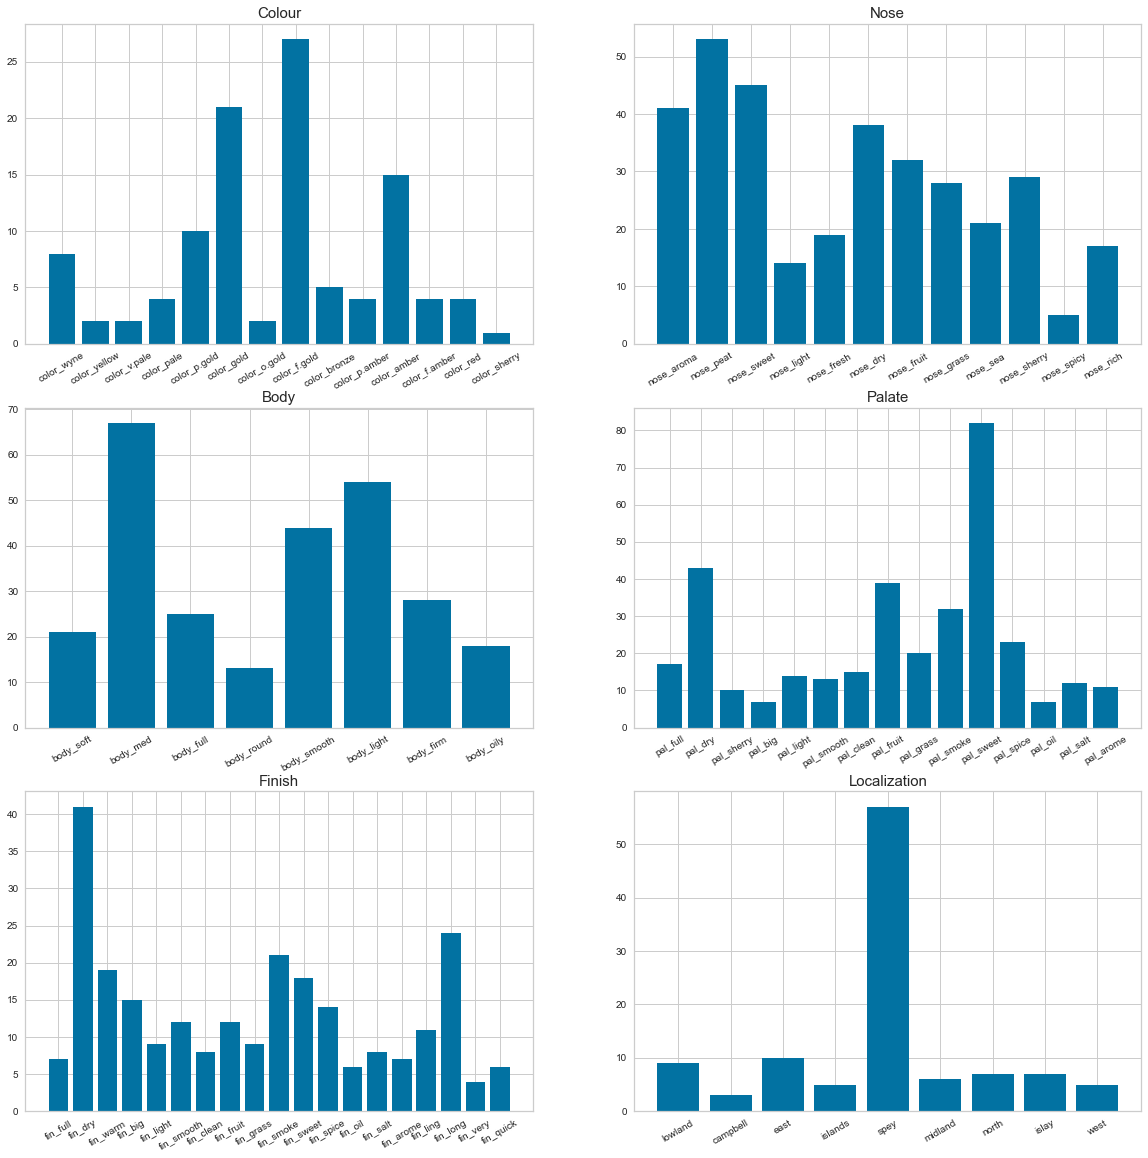

In [518]:
f, ax = plt.subplots(3, 2, figsize=[20, 20])
titles = ['Colour', 'Nose', 'Body', 'Palate', 'Finish', 'Localization']
i=0

for x in range(0, 3):
    for y in range(0, 2):
        ax[x, y].set_title(titles[i], fontsize=15)
        ax[x, y].tick_params(axis='x', labelrotation=30)
        ax[x, y].bar(labels_to_plot[i], summary[labels_to_plot[i]].values[0])
        i += 1

In [454]:
n_scotches = 109

assert(summary[color_labels].values.sum() == n_scotches)
assert(summary[loc_labels].values.sum() == n_scotches)
float(summary[loc_labels]['spey']/n_scotches * 100)

52.293577981651374


## Conclusions on the whisky data based on Jackson's five features types and binary localization data:
-	 The most numerous colour is full gold, followed by pale gold and amber. Every single Scotch has only one color assigned.
-	 'Dry' finish is most common finish value in the data set.
-	 The most numerous localization is Spey which stands for more than 52% of all localizations.

## Read coordinates data and merge it to the main data

In [456]:
coordinates = pd.read_table('data\DISTCOOR.TXT'); coordinates.head(5)

,Distillerie,West,North
0,Aberfeldy 3.875 56.62,NaN,NaN
1,Aberlour 3.22 57.46,NaN,NaN
2,Ardberg 6.08 55.64,NaN,NaN
3,Ardmore 2.67 57.32,NaN,NaN
4,Auchentoshan 4.39 55.91,NaN,NaN


In [457]:
import re

In [458]:
re.split('\s+', coordinates['Distillerie'][0])

['Aberfeldy', '3.875', '56.62']

In [459]:
coordinates['cor_west'] = pd.to_numeric(coordinates['Distillerie'].apply(lambda x: re.split('\s+', x)[1]), errors='coerce')
coordinates['cor_north'] = pd.to_numeric(coordinates['Distillerie'].apply(lambda x: re.split('\s+', x)[2]), errors='coerce')
coordinates['distillerie'] = coordinates['Distillerie'].apply(lambda x: re.split('\s+', x)[0])
coordinates = coordinates.drop(['Distillerie', 'North', 'West'], axis=1)

In [460]:
coordinates.dtypes

cor_west       float64
cor_north      float64
distillerie     object
dtype: object

In [461]:
df = df.merge(coordinates, on='distillerie'); df.head(5)

,distillerie,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,midland,spey,east,west,north,lowland,campbell,islands,cor_west,cor_north
0,Aberfeldy,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3.875,56.62
1,Aberlour,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3.220,57.46
2,Ardberg,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.080,55.64
3,Ardmore,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,2.670,57.32
4,Auchentoshan,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4.390,55.91


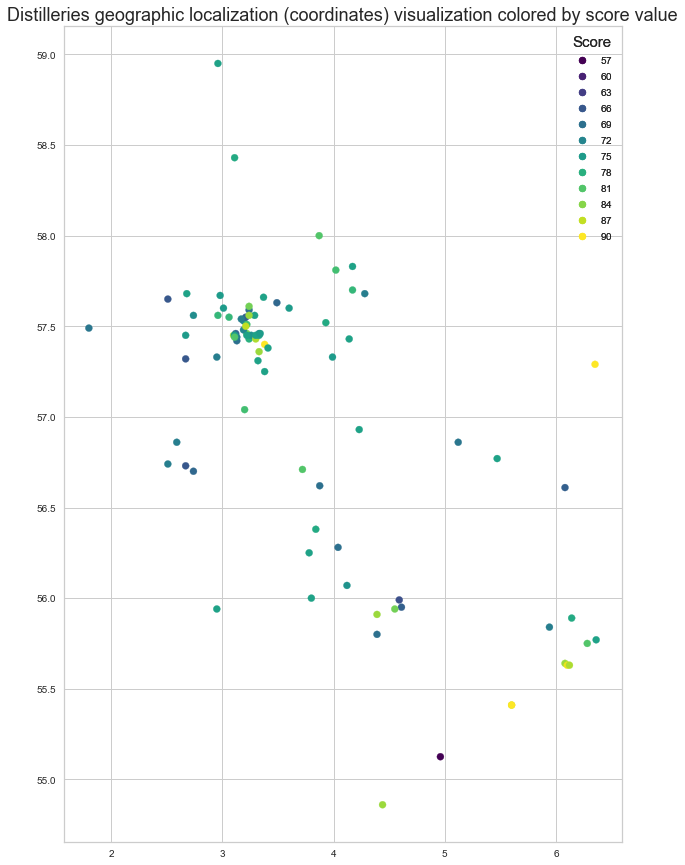

In [470]:
fig, ax = plt.subplots(figsize=[10,15])
scatter = ax.scatter(df['cor_west'], df['cor_north'], c=df['score'], cmap=cm.get_cmap('viridis', 256))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Score")
ax.add_artist(legend1)
ax.set_title('Distilleries geographic localization (coordinates) visualization colored by score value', fontsize=18)
plt.grid(True)

## Conclusions on the whisky data based geopgrahic localization:
-	 Three of four best appreciated whiskies comes from the east of Scotland.
-	 The most of distilleries are placed in the central-west part of Scotland.


# Data clustering 

### The K-means algorithm is a simple and most commonly used algorithm for clustering, the basic idea behind k-means consist of defining k clusters such that total within-cluster variation is minimum.
-	The squared distance between each point and its cluster center is the required variation.
-	The data needs to be transformed using feature scaling. Scaling will be performed using MinMaxScaler which is given by below formula:


                                             X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
                                             X_scaled = X_std * (max - min) + min

-	There is no reasonable reasons to reject any feature from the data set in advance. Clustering will be performed on the whole data set containing both Jackson features as well as metrics and localization information, of course without summary row and without distillaries.

In [481]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]; X.head(5)

,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,color_p.amber,...,midland,spey,east,west,north,lowland,campbell,islands,cor_west,cor_north
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3.875,56.62
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,3.220,57.46
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.080,55.64
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2.670,57.32
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.390,55.91


In [482]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_scaled = mms.fit_transform(X)

In [483]:
df_scaled

array([[0.        , 1.        , 0.        , ..., 0.        , 0.45504386,
        0.43031785],
       [0.        , 0.        , 0.        , ..., 0.        , 0.31140351,
        0.63569682],
       [0.        , 0.        , 0.        , ..., 0.        , 0.93859649,
        0.19070905],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.34649123,
        0.58435208],
       [0.        , 0.        , 0.        , ..., 0.        , 0.35307018,
        0.61613692],
       [0.        , 0.        , 0.        , ..., 0.        , 0.43421053,
        0.3398533 ]])

## In order to find optimum k value for K-means algorithm elbow method will be performed.

Paper: "Integration K-Means Clustering Method and Elbow Method For Identification of The Best Customer Profile Cluster", M. A. Syakur et al. (2018) 
https://www.researchgate.net/publication/324553963_Integration_K-Means_Clustering_Method_and_Elbow_Method_For_Identification_of_The_Best_Customer_Profile_Cluster

In [510]:
def calculate_ssd(x, kmax):
    """
    For each k value, one initialises k-means and uses the inertia attribute
    to identify the sum of squared distances of samples to the nearest 
    cluster centre.
    """
    ssd = []
    nc = range(2, kmax+1)
    for k in nc:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        ssd.append(km.inertia_)
    plt.plot(nc, ssd)
    plt.title('Elbow method for calculating optimum k-value')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.show()

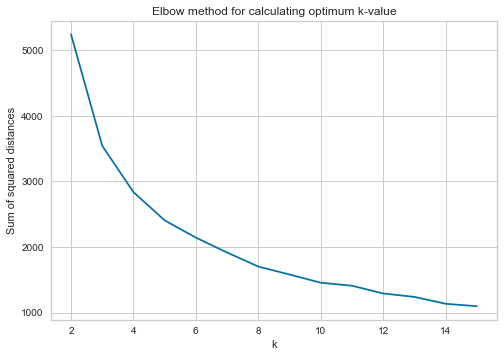

In [511]:
calculate_ssd(df_scaled, 15)

In [512]:
!pip install yellowbrick

You should consider upgrading via the 'c:\python\python37\python.exe -m pip install --upgrade pip' command.


In [513]:
from yellowbrick.cluster import KElbowVisualizer

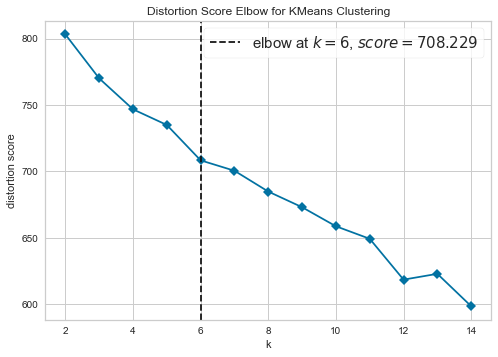

In [514]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False, locate_elbow=True)

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show() 

Optimum k value for KMeans algorithm is set to 6. Optimization was performed using KElbowVisualizer with default metric set to distortion.

Source: https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [492]:
km = KMeans(n_clusters=6, random_state=0)
km = km.fit(X)

In [493]:
pred_clusters = km.predict(X); pred_clusters

array([5, 4, 4, 3, 4, 1, 1, 5, 0, 5, 5, 0, 0, 4, 4, 0, 1, 1, 0, 1, 4, 5,
       5, 2, 5, 0, 4, 1, 5, 1, 4, 1, 1, 5, 5, 1, 1, 3, 4, 0, 0, 1, 1, 4,
       5, 0, 4, 4, 3, 1, 5, 0, 1, 3, 3, 1, 5, 0, 0, 3, 2, 2, 4, 4, 4, 5,
       4, 4, 0, 1, 4, 1, 1, 1, 1, 0, 5, 2, 2, 4, 2, 1, 1, 5, 5, 1, 1, 1,
       1])

In [494]:
df['cluster'] = pred_clusters

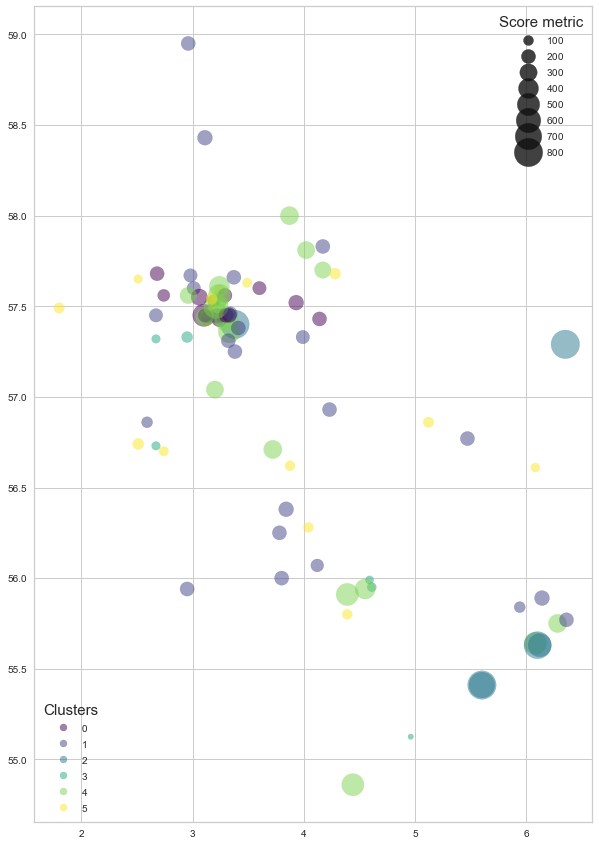

In [507]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=[10,15])
scatter = ax.scatter(df['cor_west'], df['cor_north'], c=df['cluster'], s=np.exp(df['score']/10)/10, alpha=0.5, cmap=cm.get_cmap('viridis', 118))
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.8)
legend2 = ax.legend(handles, labels, loc="upper right", title="Score metric")
ax.grid(True)

### Above scatter plot places the data geopgrahically. It also contains information regarding cluster belonging and score value which was scaled appropriately in order to be perceivable @ scatter plot.

-	Looks like the 2 out of 3 best appreciated whiskies from East coast are also in the same cluster (3).
comes from the east of Scotland.

In [504]:
from sklearn.manifold import MDS

In [505]:
df.groupby('cluster')['distillerie'].unique()

cluster
0    [Balvenie, Benrinnes, Benromach, Brackla, Cape...
1    [Aultmore, Balblair, Bruichladdich, Bunnahabha...
2    [Cragganmore, Lagavulin, Laphroaig, Springbank...
3    [Ardmore, Glenesk, Glentauchers, Inchmurrin, I...
4    [Aberlour, Ardberg, Auchentoshan, Bladnoch, Bo...
5    [Aberfeldy, Balmenach, Banff, Benriach, Colebu...
Name: distillerie, dtype: object

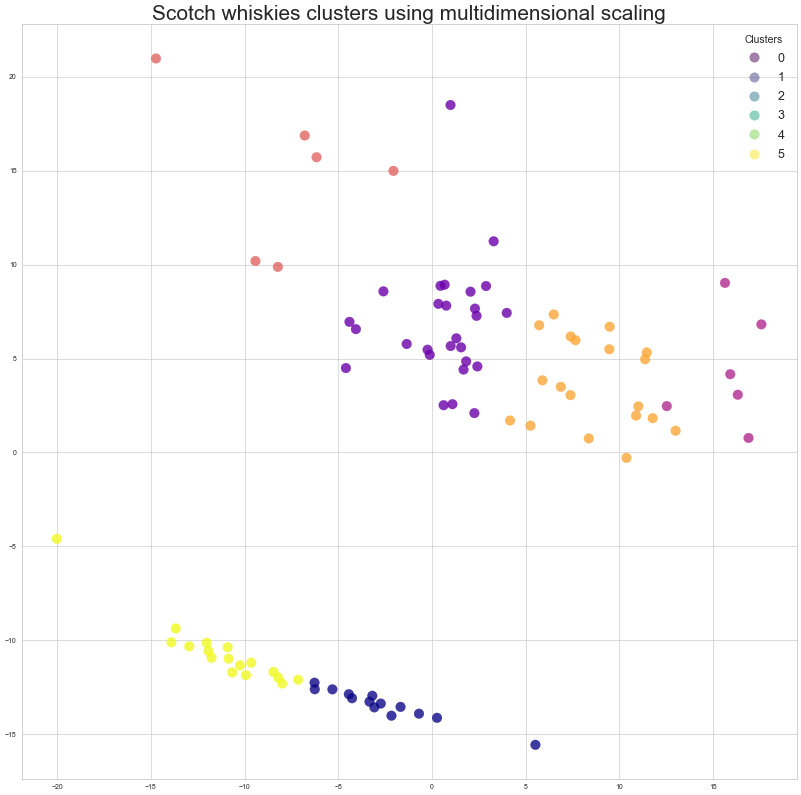

In [509]:
plt.figure(figsize=(20, 20), dpi=50)
plt.rcParams["font.size"] = 15
labels=y

model = MDS(n_components=2, dissimilarity="euclidean", random_state=0)
out = model.fit_transform(X)
plt.scatter(out[:, 0], out[:, 1], c=km.labels_, s=200, alpha=0.8, cmap=cm.get_cmap('plasma', 256))
plt.legend(*scatter.legend_elements(), loc="upper right", title="Clusters", markerscale=2, fontsize=18)
plt.title('Scotch whiskies clusters using multidimensional scaling', fontsize=30)
plt.show()

# Dummy recommender

In [578]:
user_choice = input('Please, provide the distillerie name of your favourite whisky:')

if user_choice not in df['distillerie'].values:
    print('Sorry, but we haven\'t tried this whisky yet.')
else:
    for group in df.groupby('cluster')['distillerie'].unique():
        if user_choice in group:
            group = list(group)
            group.remove(user_choice)
            if len(group) == 0:
                print(f'Sorry there is nothing similar to {user_choice}')
            else:
                print(f'You can try also: {group}')
                recommendations = group

Please, provide the distillerie name of your favourite whisky: Aberfeldy


You can try also: ['Balmenach', 'Banff', 'Benriach', 'Coleburn', 'Convalmore', 'Craigellachie', 'Deanston', 'Glenburgie', 'Glencadam', 'Glenlochy', 'Glenugie', 'Kinclaith', 'Lochside', 'Speyburn', 'Teaninich', 'Tobermory']


In [579]:
temp_df = df.copy(deep=True)

for n, row in temp_df.iterrows():
    if row['distillerie'] in recommendations:
        pass
    else:
        temp_df = temp_df.drop(n, axis=0)

temp_df

,distillerie,color_wyne,color_yellow,color_v.pale,color_pale,color_p.gold,color_gold,color_o.gold,color_f.gold,color_bronze,...,spey,east,west,north,lowland,campbell,islands,cor_west,cor_north,cluster
7,Balmenach,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,3.13,57.42,5
9,Banff,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,2.51,57.65,5
10,Benriach,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,3.24,57.59,5
21,Coleburn,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,3.21,57.55,5
22,Convalmore,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,3.12,57.46,5
24,Craigellachie,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,3.19,57.48,5
28,Deanston,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4.04,56.28,5
33,Glenburgie,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,3.49,57.63,5
34,Glencadam,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,2.74,56.70,5
44,Glenlochy,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,5.12,56.86,5


Text(0.5, 1.0, 'Scotch Score (0-100)')

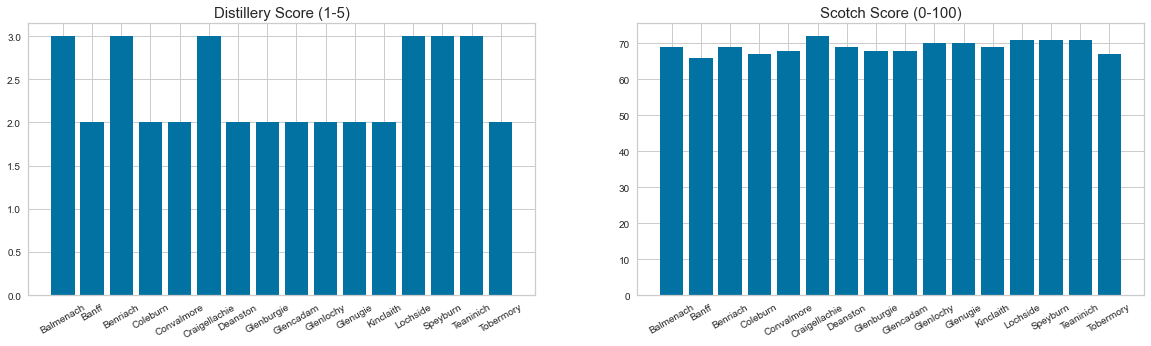

In [581]:
fig, ax = plt.subplots(1, 2, figsize=[20, 5])

ax[0].bar(temp_df['distillerie'], temp_df['dist'])
ax[0].tick_params(axis='x', labelrotation=30)
ax[0].set_title('Distillery Score (1-5)', fontsize=15)

ax[1].bar(temp_df['distillerie'], temp_df['score'])
ax[1].tick_params(axis='x', labelrotation=30)
ax[1].set_title('Scotch Score (0-100)', fontsize=15)


### Furhter analysis of recommended group could be based on distillery score as well as scotch score awarded by Jackson - both metrics could be helpfull while choosing particular whisky, e.g. one can be suggested by the score metrics and choose whisky called 'Teaninich' because it has high score value in each scoring system.

Regarding the question "What factors impact results the most?"

Scalling method performed on the features aligned the impact of each single column used for training the model.
Nevertheless features that consists of multiple columns, i.e. color which is based on 14 color labels with binary values has proportinally bigger impact than for instance 'age' which 
is kept in one column only.

In [609]:
len(color_labels)

14